In [1]:
import pandas as pd
import os

# Directories containing the .en files
directories = ['/home/mfi/Desktop/mfi/guest_rigid/dimer', '/home/mfi/Desktop/mfi/guest_rigid/DFTD3']

# Dictionary to store DataFrames with different names (E1, E2, E3, etc.)
dfs_by_name = {}

# Iterate through directories
for idx, directory in enumerate(directories, start=1):
    # Get a list of .en files sorted in ascending order based on their names
    en_files = sorted([filename for filename in os.listdir(directory) if filename.endswith('.en')])
    
    # List to store DataFrames for the current directory
    dfs = []
    
    # Loop through sorted files in the current directory
    for filename in en_files:
        file_path = os.path.join(directory, filename)
        # Load each .en file into a DataFrame and append to the list
        df = pd.read_csv(file_path, delimiter='\s+', header=None)
        df['run'] = filename
        dfs.append(df)
    
    # Concatenate all DataFrames in the current directory into a single DataFrame
    merged_df = pd.concat(dfs, axis=0, ignore_index=True)
    
    # Add values in column 5 (index 4) with values in column 7 (index 6) and store in a new column 'E_tot'
    merged_df['E_tot'] = merged_df.iloc[:, 4] + merged_df.iloc[:, 6]
    
    # Store the merged DataFrame with a unique name (E1, E2, E3, etc.)
    df_name = f'E{idx}'
    dfs_by_name[df_name] = merged_df
    
#Replace the values in the first columns of dfs_by_name['E1'] with their index doubled
dfs_by_name['E1'].iloc[:, 0] = dfs_by_name['E1'].index * 2

# Now, dfs_by_name is a dictionary where keys are names (E1, E2, E3, etc.) and values are corresponding DataFrames
# You can access each DataFrame using dictionary keys, for example: dfs_by_name['E1']


In [2]:
dfs_by_name["E1"].head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
0,0,1.0,13.076760,-265.929266,-57980.424932,0.0,2.364747,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.323851e-18,0.5,ligand-01.en,-57978.060186
1,2,1.0,32.123745,-241.862487,-57981.685853,0.0,5.809124,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.442251e-17,0.0,ligand-01.en,-57975.876729
2,4,1.0,30.759186,-311.874219,-57979.360890,0.0,5.562363,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.317870e-17,0.5,ligand-01.en,-57973.798527
3,6,1.0,26.793513,-511.537521,-57976.988092,0.0,4.845227,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.995316e-17,0.0,ligand-01.en,-57972.142865
4,8,1.0,33.743458,-652.473582,-57975.919925,0.0,6.102026,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.450764e-17,0.0,ligand-01.en,-57969.817899


In [3]:
dfs_by_name["E1"].tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
74995,149990,1.0,264.299525,356.789693,-57945.154530,0.0,47.794822,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.197830e-15,0.0,ligand-02.en,-57897.359709
74996,149992,1.0,248.472249,253.250529,-57941.789895,0.0,44.932683,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.262933e-15,0.5,ligand-02.en,-57896.857212
74997,149994,1.0,261.010817,136.479890,-57943.780941,0.0,47.200105,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.300438e-15,0.0,ligand-02.en,-57896.580835
74998,149996,1.0,283.594754,-29.581268,-57946.375032,0.0,51.284090,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.286383e-15,0.5,ligand-02.en,-57895.090941
74999,149998,1.0,281.197000,-285.294739,-57945.599327,0.0,50.850490,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.601082e-16,0.0,ligand-02.en,-57894.748836


In [4]:
dfs_by_name["E2"].head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
0,52882,1.0,342.531671,-3.905743,-28958.561530,0.0,30.970998,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.881892e-17,1.5,ligand-08.en,-28927.590532
1,52884,1.0,297.250791,-2.550236,-28953.545014,0.0,26.876795,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.744520e-17,0.5,ligand-08.en,-28926.668218
2,52886,1.0,329.511583,-0.030065,-28956.722842,0.0,29.793749,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.240531e-17,0.0,ligand-08.en,-28926.929094
3,52888,1.0,327.160237,1.918595,-28957.360595,0.0,29.581145,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,9.166330e-17,0.5,ligand-08.en,-28927.779450
4,52890,1.0,343.811902,1.833479,-28958.292452,0.0,31.086754,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,8.465624e-17,0.5,ligand-08.en,-28927.205698


In [5]:
dfs_by_name["E2"].tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
12495,77872,1.0,291.856115,5.119589,-28960.557980,0.0,26.389020,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.019449e-16,0.5,ligand-08.en,-28934.168959
12496,77874,1.0,326.680278,3.870287,-28962.811104,0.0,29.537748,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.378795e-16,0.5,ligand-08.en,-28933.273356
12497,77876,1.0,278.766003,2.858633,-28959.938232,0.0,25.205439,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.484585e-16,0.0,ligand-08.en,-28934.732793
12498,77878,1.0,257.997049,2.903509,-28959.200714,0.0,23.327554,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.638282e-16,0.5,ligand-08.en,-28935.873160
12499,77880,1.0,280.524767,2.534718,-28961.132517,0.0,25.364463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.596028e-16,0.0,ligand-08.en,-28935.768054


In [6]:
dfs_by_name["E3"].head()

KeyError: 'E3'

In [7]:
dfs_by_name["E3"].tail()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,run,E_tot
12495,77872,1.0,291.856115,5.119589,-28960.557980,0.0,26.389020,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,7.019449e-16,0.5,ligand-08.en,-28934.168959
12496,77874,1.0,326.680278,3.870287,-28962.811104,0.0,29.537748,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.378795e-16,0.5,ligand-08.en,-28933.273356
12497,77876,1.0,278.766003,2.858633,-28959.938232,0.0,25.205439,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.484585e-16,0.0,ligand-08.en,-28934.732793
12498,77878,1.0,257.997049,2.903509,-28959.200714,0.0,23.327554,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,6.638282e-16,0.5,ligand-08.en,-28935.873160
12499,77880,1.0,280.524767,2.534718,-28961.132517,0.0,25.364463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.596028e-16,0.0,ligand-08.en,-28935.768054


In [7]:
avg_1 = dfs_by_name["E1"].iloc[:, 21].mean()
avg_2 = dfs_by_name["E2"].iloc[:, 21].mean()

print(avg_1, avg_2)

-57880.6767002669 -28937.186536978807


In [8]:
U_int = dfs_by_name["E1"].iloc[:, 21] - (2*avg_2)

print(U_int.mean()*4.184)
print(U_int)

-26.37437247804192
0       -103.687112
1       -101.503656
2        -99.425453
3        -97.769791
4        -95.444826
            ...    
74995    -22.986635
74996    -22.484138
74997    -22.207761
74998    -20.717868
74999    -20.375762
Name: E_tot, Length: 75000, dtype: float64


avg of second half: -25.196454255002703 kJ/mol


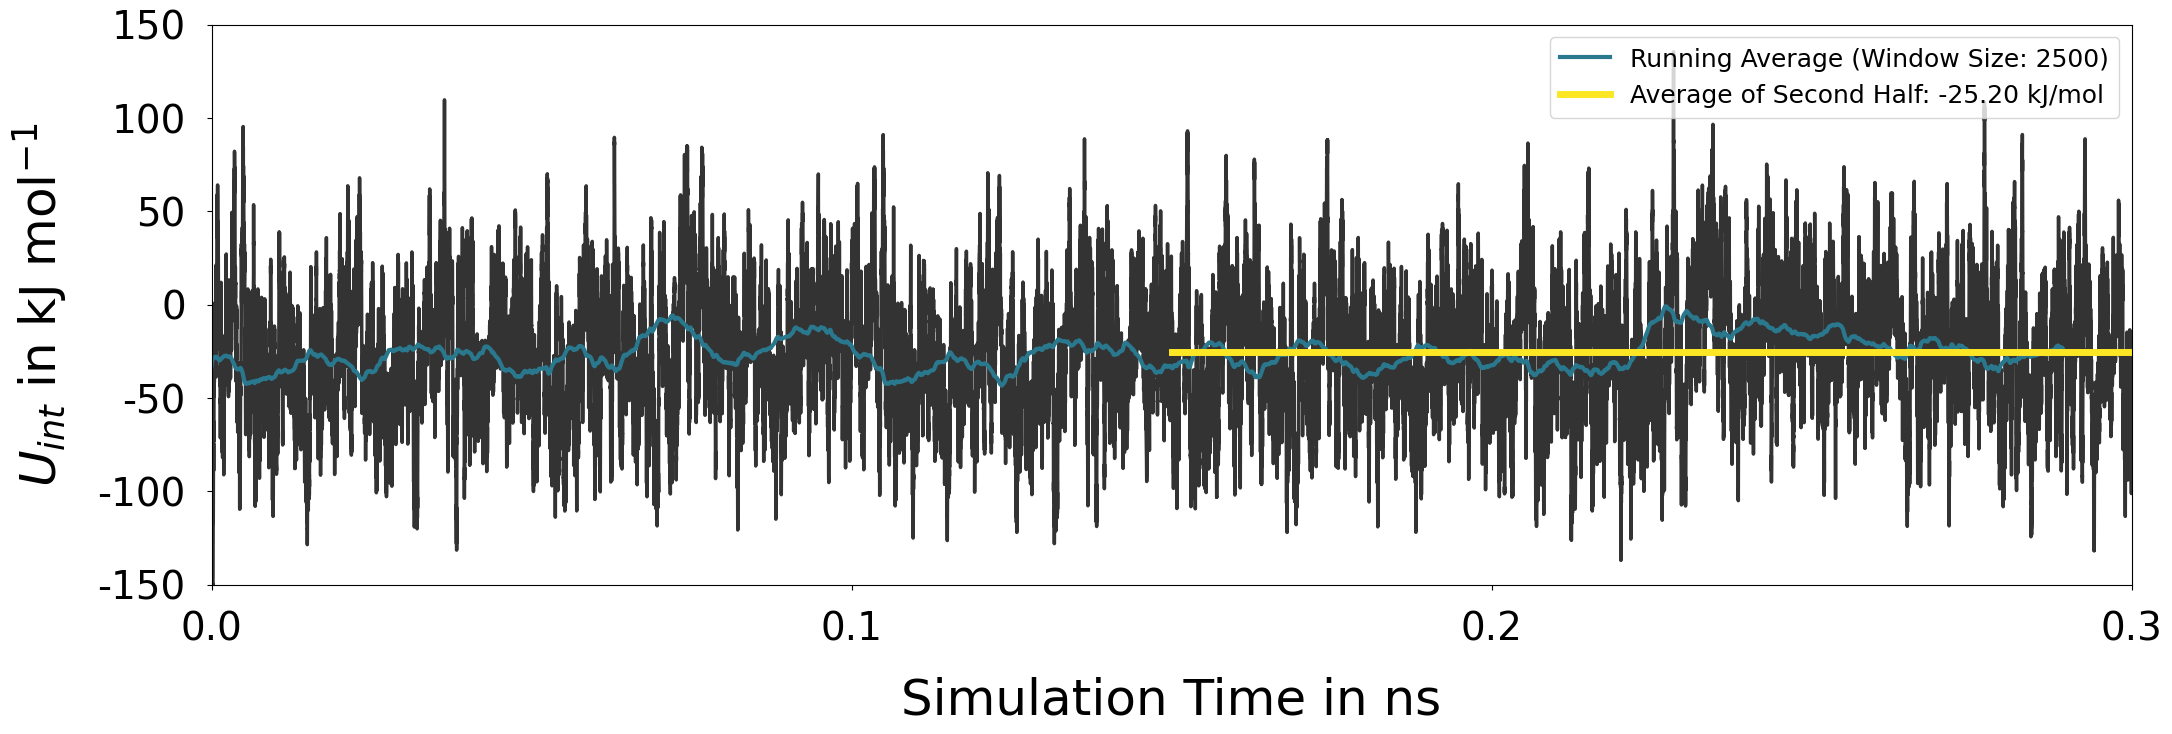

In [25]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.pyplot import colormaps
import seaborn as sns

plt.style.use('default')
sns.set_style(rc = {'axes.facecolor': '#FFFFFF'})

#plt.style.use('default')

# Assuming dfs_by_name is the dictionary containing your DataFrames (E1, E2, E3, etc.)
# For example, dfs_by_name = {'E1': E1, 'E2': E2, 'E3': E3, ...}

# Specify the end point for the transparent range
x_end = 0.0 # end of the transparent range (set your value)


# Get x-values from DataFrame E1
x_values = dfs_by_name['E1'].iloc[: 0] * 2 / 1000000  # Assuming column 1 is used as x-values

# Get y-values from DataFrame E2
y_values = U_int * 4.184 

# Convert to NumPy arrays
x_values = np.array(dfs_by_name['E1'].iloc[:, 0]) * 2 / 1000000  # Convert to array
y_values = np.array(U_int) * 4.184  # Convert to array

x_values = np.sort(x_values)

# Calculate the mean of the second part of y_values
second_part_mean = y_values[len(y_values) // 2:].mean()

print(f'avg of second half: {second_part_mean} kJ/mol')

# Calculate running average with a window size of 100 data points
window_size = 2500
running_avg = np.convolve(y_values, np.ones(window_size)/window_size, mode='valid')
#print(f"current running avg: {running_avg[-1]} kJ/mol")

# Adjust x-values to match the running average length
adjusted_x_values = np.sort(x_values[:len(running_avg)])

# Plotting x-values vs y-values
plt.figure(figsize=(24, 8))
plt.xlim(min(x_values), max(x_values))
#plt.plot(x_values[1:-1], y_values[1:-1], linewidth="1", color="k", alpha=0.8)

# Part 1: From the start up to x_end (transparent)
mask1 = x_values <= x_end
plt.plot(x_values[mask1], y_values[mask1], linewidth="2.5", color="k", alpha=0.3)

# Part 2: From x_end to the end (non-transparent)
mask2 = x_values > x_end
plt.plot(x_values[mask2], y_values[mask2], linewidth="2.5", color="k", alpha=0.8)

# Plotting running avg
plt.plot(adjusted_x_values, running_avg, linestyle='-', color="#2a788e", linewidth="3", label=f'Running Average (Window Size: {window_size})')

# Determine the range for x-axis ticks
x_min = min(x_values)
x_max = max(x_values)
y_min = min(y_values)
y_max = max(y_values)
x_ticks = np.arange(x_min, x_max+0.00001, 0.1)  # Adjust 0.1 to the desired spacing
plt.xticks(x_ticks, fontsize="28")  # Set x-axis ticks
#y_ticks = np.arange(y_min, y_max, 100)
#plt.yticks(y_ticks, fontsize="12")

# Round down y_min to the nearest 100 and round up y_max to the nearest 100
y_start = 100 * (y_min // 100)
y_end = 100 * (y_max // 100 + 1)

# Generate y-axis ticks
y_ticks = np.arange(y_start, y_end+0.000001, 100,)  # Adjust 100 to the desired spacing

# Add the specific number to the existing y_ticks
specific_number = second_part_mean  # Replace with your specific number
#y_ticks = np.append(y_ticks, specific_number)

# Define custom labels for the y-axis
#y_labels = [f'{tick}' if tick != specific_number else r'$\mathbf{' + f'{tick:.2f}' + '}$' for tick in y_ticks]
y_labels = [f'{int(tick)}' if tick != specific_number else r'$\mathbf{' + f'{int(tick)}' + '}$' for tick in y_ticks]


plt.yticks(y_ticks, y_labels, fontsize="28")  # Set y-axis ticks

# Add this line to display tick mark lines inside the plot area
plt.tick_params(axis='both', which='both', direction='out', bottom=True, top=False, left=True, right=False, pad=15)

# Specify xmin parameter to visually show the second half of the mean line
#plt.axvline(x=x_max/2, linestyle='-', color="#fde725", linewidth="2.5")
plt.axhline(y=second_part_mean, linestyle='-', color="#fde725", linewidth="5",label=f'Average of Second Half: {second_part_mean:.2f} kJ/mol', xmin=0.5, xmax=1)
plt.xlabel('Simulation Time in ns', fontsize='36', labelpad = 20)
plt.ylabel(r'$U_{int}$ in kJ mol$^{-1}$', fontsize='36', labelpad = 20)
#plt.title('ΔU of 1guest@MOF')
#plt.grid(linestyle="-")
plt.ylim(-150, 150)
ticks = np.arange(-150, 151, 50)
labels = [str(tick) for tick in ticks]
plt.yticks(ticks, labels)
#plt.fill_between(running_avg.index, 0, running_avg, color="b", alpha=0.1)
#plt.legend()
plt.grid(False)
#plt.title('3Phth@MIL-68(Ga)', fontsize='36')
plt.legend(fontsize='18', loc = "upper right")
plt.subplots_adjust(left=0.15, right=0.95, bottom=0.20, top=0.90)
plt.savefig("/home/mfi/Desktop/mfi/images/DimerEnergy.png")
plt.show()